# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more manageable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
Successfully complete all these objectives to earn full credit. 

**Successful completion is defined as passing all the unit tests in each objective.**  

Each unit test that you pass is 1 point. 

There are 5 total possible points in this sprint challenge. 


There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

____

# Before you submit your notebook you must first

1) Restart your notebook's Kernel

2) Run all cells sequentially, from top to bottom, so that cell numbers are sequential numbers (i.e. 1,2,3,4,5...)
- Easiest way to do this is to click on the **Cell** tab at the top of your notebook and select **Run All** from the drop down menu. 

3) Comment out the cell that generates a pyLDAvis visual in objective 4 (see instructions in that section). 
____



### Import Data

In [1]:
import pandas as pd

# Load reviews from URL
data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_4/unit1_nlp/review_sample.json'

# Import data into a DataFrame named df
# YOUR CODE HERE
df=pd.read_json(data_url, lines=True)
df

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA
...,...,...,...,...,...,...,...,...,...
9995,1h3ysSuSazvXc1aeLiiOew,0,2017-10-07 10:57:15,1,kAYnguBAJ2Ovzz5s49fMcQ,1,My family and I were hungry and this Subway is...,1,QFYqAk8n5Z1O3t7zwjA7Hg
9996,Rwahe1zbFpw6VIjb5ngZeg,0,2014-01-18 15:52:52,0,5Huai3nJAaeN8X0vCXqOew,3,My wife and I came here with a a couple of fri...,0,X7jQ-4788irfe5ABZNvYcA
9997,8itGZAOBMiTbHKOwLuh4_Q,0,2018-08-26 02:53:21,0,wmRCto8yNnmMCNc_nfL5Dg,2,The food was just OK and not anything to brag ...,0,_pi5J_1CIQWceLhTJkx_yA
9998,A5Rkh7UymKm0_Rxm9K2PJw,0,2018-04-23 23:36:07,0,zlIU9GEI3MP5LXBpEM5qsw,4,Today's visit is great!! Love and enjoy Town S...,0,PP1K311ZKbpDgTjwic3u5Q


In [2]:
# Visible Testing
assert isinstance(df, pd.DataFrame), 'df is not a DataFrame. Did you import the data into df?'
assert df.shape[0] == 10000, 'DataFrame df has the wrong number of rows.'

## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [3]:
import re
def clean_data(text):
  # Remove newline characters
  text = text.replace('\n', ' ')

  # Remove punctuation (cannot use RegEx because some reviews are in Chinese)
  text = text.replace('.', ' ')
  text = text.replace(',', '')
  text = text.replace('!', ' ')
  text = text.replace('?', ' ')
  text = text.replace('<', ' ')
  text = text.replace('>', ' ')

  # Remove double whitespace created by cleaning
  text = re.sub("[ ]{2,}", ' ', text)

  return text

In [4]:
df['text'] = df['text'].apply(clean_data)

In [5]:
# Optional: Consider using spaCy in your function. The spaCy library can be imported by running this cell.
# A pre-trained model (en_core_web_sm) has been made available to you in the CodeGrade container.
# If you DON'T need use the en_core_web_sm model, you can comment it out below.
import spacy
nlp = spacy.load('en_core_web_sm')

In [6]:
def tokenize(doc):
# YOUR CODE HERE
    lemmas = []
    for token in nlp(doc):
        if (token.is_stop == False) & (token.is_punct == False) & (token.is_space == False):
            lemmas.append(token.lemma_.lower())

    return lemmas

In [7]:
'''Testing'''
assert isinstance(tokenize(df.sample(n=1)["text"].iloc[0]), list), "Make sure your tokenizer function accepts a single document and returns a list of tokens!"

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews (i.e. create a doc-term matrix).
2. Write a fake review and query for the 10 most similar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, use `NearestNeighbors` model for this. 

In [8]:
%%time
# Create a vector representation of the reviews 
# Name that doc-term matrix "dtm"

# YOUR CODE HERE
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate the vectorizer with spaCy tokenizer & default stop_words
tfidf_vect = TfidfVectorizer(tokenizer = tokenize)

# Fit vectorizer to create the vocabulary
tfidf_vect.fit(df['text'])

# Create the document-term matrix
dtm = tfidf_vect.transform(df['text'])

# Transform document-term matrix into dataframe for human readability
df_dtm = pd.DataFrame(data = dtm.toarray(), columns = tfidf_vect.get_feature_names())

df_dtm

c:\users\iamwe\.virtualenvs\05.sprint_challenge-smsjbv6h\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


Wall time: 6min


,$,'bout,'cause,'coz,'em,'nuff,+,+1,-$2,-$8,...,漁膳房,現在はまだ仮設の建物での営業ですが、現在コース全体を見渡せるような建物を建築中です,終わったら、あなたが乗らなかったほかの車にも、シートに座ったり、写真を撮ったりして楽しんでください。きっと彼らはそんな日本人の姿を喜んでくれるはずです,結構、この店は評判にばらつきがあるようで・・・待ち時間が長い、サービスがあまりよくない、中華の割りにボリューム少ないなどの不評と、食べ物はうまい、という評判と両方です,美味的味道,豆腐花,質問にも丁寧に答えてくれましたし、日本人の方も日本語が話せる方も居て、とても綺麗で居心地のいいお店でした,車好きさんには、この体験が素晴らしいものであると容易に想像できるはずなので、それ以外のところのレビューをします,運転しない/できない人でも、サーキット体験はできます。99ドルでドリフト2周というもので、プロドライバーの運転を助手席で体験することができます。わたしはドリフトにとっても興味がありましたが、ひどい腰痛のため泣く泣く諦めていたところ、インストラクターよりトップスピードを体験することもできると提案があり、ランボルギーニ・ウラカンに乗車することができました。プロの運転はまさにジェットコースター、ストレートでのトップスピードと、12か所のコーナーのステアリングさばきは実にお見事でとてもいい体験になりました。もちろん、これもビデオに収めてもらいました,運転中も英語で指導があります。英語が得意でなくても、手振りと単語で理解できると思います。インストラクター席にはブレーキペダルがありますから、安心です
0,0.063444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.089691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.081950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Create and fit a NearestNeighbors model named "nn"
from sklearn.neighbors import NearestNeighbors

# YOUR CODE HERE
# Instantiate NearestNeigbors model
nn = NearestNeighbors(n_neighbors = 10)

# Fit NN model on Tf-idf Document-Term Matrix
nn.fit(dtm)

NearestNeighbors(n_neighbors=10)

In [10]:
'''Testing.'''
assert nn.__module__ == 'sklearn.neighbors._unsupervised', ' nn is not a NearestNeighbors instance.'
assert nn.n_neighbors == 10, 'nn has the wrong value for n_neighbors'

In [11]:
# Create a fake review and find the 10 most similar reviews

# YOUR CODE HERE
fake_review = "I did the pandemic dinner special. 2 large pizzas, a salad and \
wings for $40.00. So I went with the dirtwolf BBQ and meathead. The pizzas were\
incredible, definitely will be doing this again. Perfect type of hand tossed \
crust with a nice crunch to it and the flavors were amazing. Oh the wings... \
almost forgot. They are breaded crispy, perfectly cooked. I tried the chipotle\
flavor and it was amazing. Just a smoky chipotle, it says hot but it's pretty\
mild of a flavor and they put the sauce on the side. So you can toss them in\
a bowl when you get home. Which I think totally helps the wings to stay crispy.\
On to the beer. They also have a 3 crowlers (2 pint cans) for 10 bucks. \
I'm drinking the one Cloud Walker Hazy Juicy IPA tonight. It's a orange-blonde \
with a lot of tropic fruit undertones. But, it's definitely an IPA. \
Very refreshing citr My only suggestion is to bring cash. They charge your card\
over the phone but due to the pandemic they don't have you sign anything. So I \
felt like a real jerk because I never carry cash with me and I alway just tip \
on the card. So if I was to change one minor thing it would be to ask if you \
want to put the tip on the card. Now I've seen on Instagram that they have taco\
making kits, and I'm definitely going to try that out. Hopefully when this is\
all figured out I can do a brewery tour, but for now it's going to have to be\
just pickup."

# Clean the fake review
fake_review_clean = clean_data(fake_review)

# Tokenize and vectorize the fake review
fake_review_vector = tfidf_vect.transform([fake_review_clean])

# Find the 10 nearest neighbors for the fake review
ten_nn_dist, ten_nn_indices = nn.kneighbors(fake_review_vector)

# Print the text of the reviews for the 10 nearest neighbors
for i in ten_nn_indices:
  print(df['text'][i])

6684    Went there for lunch today and it was awesome ...
5962    Dined on 9/2/2016 Hands down some of the best ...
4121    Served is a clean well maintained cute little ...
2442    The pizza and the wings were simply OK The wor...
6467    Decided to give this place a try because it wa...
2090    Great beer great wait staff and excellent chic...
8356    I've tried many of the menu items and daily sp...
2484    Good pizza Variety of types to choose from Buf...
4551    Awesome place for beers of course and the staf...
2170    We ordered takeout boneless and buffalo wings ...
Name: text, dtype: object


## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a pipeline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier.
    - Use that pipeline to train a model to predict the `stars` feature (i.e. the labels). 
    - Use that Pipeline to predict a star rating for your fake review from Part 2. 



2. Create a parameter dict including `one parameter for the vectorizer` and `one parameter for the model`. 
    - Include 2 possible values for each parameter
    - **Use `n_jobs` = 1** 
    - Due to limited computational resources on CodeGrader `DO NOT INCLUDE ADDITIONAL PARAMETERS OR VALUES PLEASE.`
    
    
3. Train the entire pipeline with a GridSearch
    - Name your GridSearch object as `gs`

In [12]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# YOUR CODE HERE
# Create X_train and y_train
X_train = df['text']
y_train = df['stars']

# Set up pipeline components
vect = TfidfVectorizer(tokenizer = tokenize)
clf = XGBClassifier()

# Set up pipeline
pipe = Pipeline([('vect', vect), ('clf', clf)])

# Set up parameter grid for GridSearchCV
param_grid = {
    'vect__max_df': [.75, 1.0],
    'clf__max_depth': [10, 15]
}

# Set up GridSearchCV
gs = GridSearchCV(pipe, param_grid, cv = 3, n_jobs=1, verbose=1)

# Fit the model and do cross validation
gs.fit(X_train,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


c:\users\iamwe\.virtualenvs\05.sprint_challenge-smsjbv6h\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:59:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(tokenizer=<function tokenize at 0x0000028F04A8ED30>)),
                                       ('clf',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
              

In [13]:
print(gs.best_params_)
print(gs.best_estimator_)
print(gs.best_score_)

{'clf__max_depth': 10, 'vect__max_df': 0.75}
Pipeline(steps=[('vect',
                 TfidfVectorizer(max_df=0.75,
                                 tokenizer=<function tokenize at 0x0000028F04A8ED30>)),
                ('clf',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=10, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1,
                               objective='multi:softprob', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
  

In [14]:
# Predict the stars for the fake review
print(f'The fake review has {gs.predict([fake_review_clean])[0]} stars!')

The fake review has 5 stars!


In [15]:
# Visible Testing
prediction = gs.predict(["I wish dogs knew how to speak English."])[0]
assert prediction in df.stars.values, 'You gs object should be able to accept raw text within a list. Did you include a vectorizer in your pipeline?'

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Set num_topics to `5`
    - Name your LDA model `lda`
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

When you instantiate your LDA model, it should look like this: 

```python
lda = LdaModel(corpus=corpus,
               id2word=id2word,
               random_state=723812,
               num_topics = num_topics,
               passes=1
              )

```

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

## Note about  pyLDAvis

**pyLDAvis** is the Topic modeling package that we used in class to visualize the topics that LDA generates for us.

You are welcomed to use pyLDAvis if you'd like for your visualization. However, **you MUST comment out the code that imports the package and the cell that generates the visualization before you submit your notebook to CodeGrade.** 

Although you should leave the print out of the visualization for graders to see (i.e. comment out the cell after you run it to create the viz). 

In [16]:
from gensim import corpora
# Due to limited computationalresources on CodeGrader, use the non-multicore version of LDA 
from gensim.models.ldamodel import LdaModel
import gensim
import re

c:\users\iamwe\.virtualenvs\05.sprint_challenge-smsjbv6h\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


### 1. Estimate a LDA topic model of the review tex

In [17]:
# Remember to read the LDA docs for more information on the various class attirbutes and methods available to you
# in the LDA model: https://radimrehurek.com/gensim/models/ldamodel.html

# don't change this value 
num_topics = 5

# use tokenize function you created earlier to create tokens 
df['lemmas'] = df['text'].apply(tokenize)

# create a id2word object (hint: use corpora.Dictionary)
id2word = corpora.Dictionary(df['lemmas'])

# create a corpus object (hint: id2word.doc2bow)
corpus = [id2word.doc2bow(text) for text in df['lemmas']]

# instantiate an lda model
lda = LdaModel(corpus=corpus,
               id2word=id2word,
               random_state=723812,
               num_topics = num_topics,
               passes=1
              )

#### Testing

In [18]:
# Visible Testing
assert lda.get_topics().shape[0] == 5, 'Did your model complete its training? Did you set num_topics to 5?'

#### 2. Create 1-2 visualizations of the results

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use pyLDAvis (or a ploting tool of your choice) to visualize your results
# import pyLDAvis
# import pyLDAvis.gensim_models 

# # YOUR CODE HERE
# pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim_models.prepare(topic_model=lda, 
#                                      corpus=corpus, dictionary=id2word)
# vis

c:\users\iamwe\.virtualenvs\05.sprint_challenge-smsjbv6h\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.035089 -0.042381       1        1  30.626248
2     -0.035992 -0.006667       2        1  25.150645
1      0.107137 -0.064322       3        1  23.078132
0     -0.088602  0.005618       4        1  17.213610
3      0.052546  0.107752       5        1   3.931366, topic_info=      Term         Freq        Total Category  logprob  loglift
147   food  4864.000000  4864.000000  Default  30.0000  30.0000
207  great  4289.000000  4289.000000  Default  29.0000  29.0000
130  place  5235.000000  5235.000000  Default  28.0000  28.0000
44    good  6281.000000  6281.000000  Default  27.0000  27.0000
208   hair   369.000000   369.000000  Default  26.0000  26.0000
..     ...          ...          ...      ...      ...      ...
234    way    48.558151  1164.631867   Topic5  -5.9908   0.0588
0        $    52.812629  2192.241867   Topic5  -5.9068  -0.4897
39     try    49.000044  2514.555107   Topic5  -5.9817  -0.7018
297  thing    45.406585  1196.340426   Topic5  -6.0579  -0.0352
117   year    41.913630  1025.113095   Topic5  -6.1379   0.0392

[455 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
0          1  0.551034     $
0          2  0.213936     $
0          3  0.140039     $
0          4  0.070704     $
0          5  0.024176     $
...      ...       ...   ...
117        3  0.506286  year
117        4  0.156080  year
117        5  0.040971  year
11443      1  0.983667   yuk
3463       4  0.976403     à

[1183 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 2, 1, 4])

<AxesSubplot:title={'center':'Top 20 Most Common Words Used in Yelp Reviews'}>

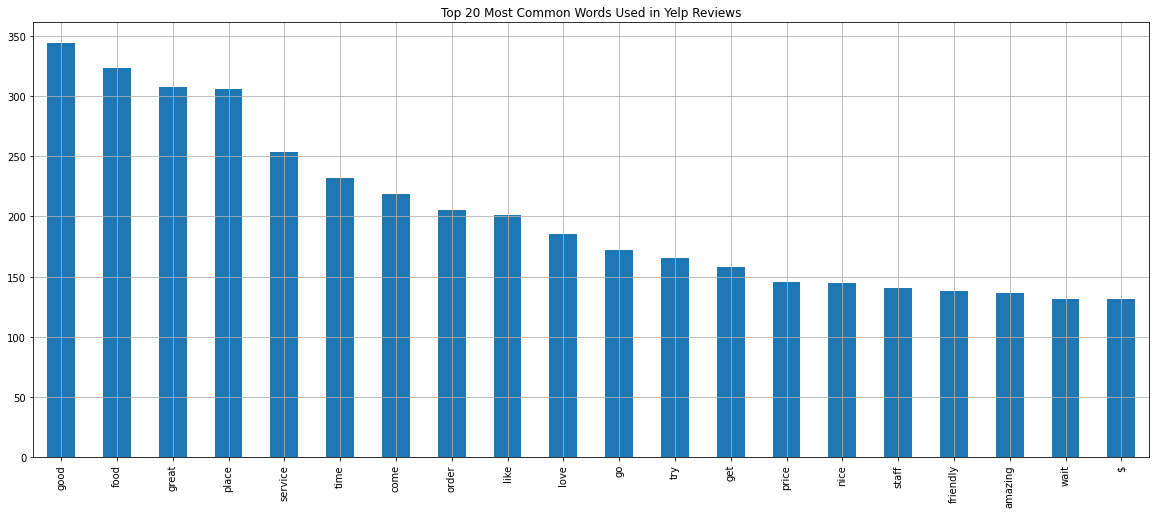

In [20]:
top_n = 20
sorted_terms = df_dtm.sum().sort_values(ascending=False)

plt.title('Top {} Most Common Words Used in Yelp Reviews'.format(top_n))
sorted_terms[:top_n].plot(kind='bar', figsize=(20,8), grid=True)

#### 3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

Based on the pyLDA visualization, it appears that 5 topics in the Yelp reviews are as follows (based on the most frequent terms in each topic):

1. Order Food
2. Good Place
3. Time & Service
4. Good Food/Great Place
5. Hair Cut Place

Of these topics, it appears that Topic 1, Topic 2, and Topic 4 have a lot of overlapping words, which tells us that these topics are very similar. Given that these topics all deal with food, restaurants, or a good place to visit, this similarity is unsurprising. What is surprising is that Topic 3, which deals with "time" & "service" does not overlap with Topics 1, 2, & 4 given that these topics also have frequent mention of "service." This could be because those most frequent terms are still relatively less frequent in Topic 5 and that caused the pyLDAvis to display Topic 3 as not overlapping.

The bar graph visualization confirms that "good", "great", "place", "food", & "service" are the most frequent terms in the Yelp reviews. This further shows that most of the reviews in this dataset are for restaurants and other food establishments and that the reviews tend to skew positive (though further sentiment analysis is needed to confirm the latter).